In [39]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import os
from PIL import Image
import cv2
import warnings
warnings.filterwarnings("ignore")


import os

In [40]:
!pip install xmltodict #installing the library to read XMl files

In [186]:
prefix = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/"

In [214]:
def list_imagenames(path, label):
    images = []
    walk_path = prefix + path
    for dirname, _, filenames in os.walk(walk_path):
        for filename in filenames:
            images.append((os.path.join(walk_path, filename), label))
            
    return images

In [215]:
train_withmask = list_imagenames("Train/WithMask", 0)
train_withoutmask = list_imagenames("Train/WithoutMask", 1)
test_withmask = list_imagenames("Test/WithMask", 0)
test_withoutmask = list_imagenames("Test/WithoutMask", 1)
validation_withmask = list_imagenames("Validation/WithMask", 0)
validataion_withoutmask = list_imagenames("Validation/WithoutMask", 1)

imagenames = []
for c in [train_withmask, train_withoutmask, test_withmask, test_withoutmask, validation_withmask, validataion_withoutmask]:
    imagenames.extend(c)

In [210]:
options={"with_mask":0,"without_mask":1} # mapping

In [211]:
def drow_image(path, input_info): #function to visualize images
    image_path = input_info[0]
        
    image=plt.imread(os.path.join(image_path))
    fig,ax=plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(10,5)
    ax.imshow(image)

('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_520_2977848.png', 0)


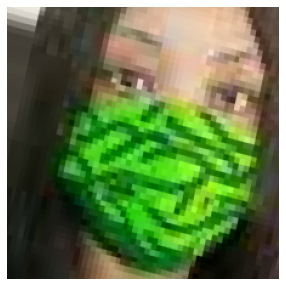

In [216]:
print(train_withmask[0])
drow_image("Train", train_withmask[0])

In [238]:
import collections
def make_dataset(imagenames): #function to make dataset
    image_tensor=[]
    label_tensor=[]
    for image_info in imagenames:
        label=image_info[1]
        image=Image.open(image_info[0]).convert("RGB")
        image_tensor.append(my_transform(image))
        label_tensor.append(torch.tensor(label))
                
    final_dataset=[[k,l] for k,l in zip(image_tensor,label_tensor)]
    return tuple(final_dataset)

In [239]:
#importing neccessary libraries for deeplearning task..
import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader

my_transform=transforms.Compose([
                                 transforms.Resize((64, 64)),
                                 transforms.CenterCrop(64),
                                 transforms.ToTensor()
                                ])

dataset=make_dataset(imagenames) #making a datset
train_size=int(len(dataset)*0.8)
test_size=len(dataset)-train_size
batch_size=32
trainset,testset=torch.utils.data.random_split(dataset,[train_size,test_size])
train_loader = DataLoader(dataset=trainset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(dataset=testset,batch_size=batch_size,shuffle=True)

In [240]:
print("dataset: ", len(dataset))
print("train_size: ", train_size)
print("test_szie: ", test_size)
print("train_set", testset)
for i in testset:
    print(i[1])

dataset:  11792
train_size:  9433
test_szie:  2359
train_set <torch.utils.data.dataset.Subset object at 0x7f57c83a5450>
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)


tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)


In [ ]:
resnet=models.resnet34(pretrained=True)

In [241]:
resnet = models.resnet50(pretrained=True)

In [242]:
import torch.nn as nn
n_inputs=resnet.fc.in_features
last_layer=nn.Linear(n_inputs,3)
resnet.fc.out_features=last_layer

if torch.cuda.is_available():
    resnet.cuda()
    
print(resnet.fc.out_features)

Linear(in_features=2048, out_features=3, bias=True)


In [243]:
if torch.cuda.is_available(): #checking for GPU availability
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [244]:
for paramet in resnet.parameters():
    paramet.requires_grad=True

In [ ]:
resnet.parameters()

In [245]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()

optimizer=optim.SGD(resnet.parameters(),lr=0.001)

In [246]:
n_epochs=10

for epoch in range(1,n_epochs+1):
    train_loss = 0.0

    for batch,(data,target) in enumerate(train_loader):


        if torch.cuda.is_available():
            data , target = data.cuda(), target.cuda()

        optimizer.zero_grad()
        output=resnet(data)
        loss=criterion(output,target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        if batch%20==19:
            print("Epoch {}, batch {}, training loss {}".format(epoch, batch+1,train_loss/20))
        train_loss = 0.0

Epoch 1, batch 20, training loss 0.3291449069976807
Epoch 1, batch 40, training loss 0.09428907036781312
Epoch 1, batch 60, training loss 0.028870341181755067
Epoch 1, batch 80, training loss 0.008837730437517167
Epoch 1, batch 100, training loss 0.015527492761611939
Epoch 1, batch 120, training loss 0.011873622238636018
Epoch 1, batch 140, training loss 0.002253603935241699
Epoch 1, batch 160, training loss 0.007718512415885925
Epoch 1, batch 180, training loss 0.0026798605918884276
Epoch 1, batch 200, training loss 0.0015719696879386903
Epoch 1, batch 220, training loss 0.0007027164101600647
Epoch 1, batch 240, training loss 0.010065563023090363
Epoch 1, batch 260, training loss 0.0010669678449630737
Epoch 1, batch 280, training loss 0.0028427258133888245
Epoch 2, batch 20, training loss 0.0023213550448417664
Epoch 2, batch 40, training loss 0.0005377620458602905
Epoch 2, batch 60, training loss 0.00047217607498168946
Epoch 2, batch 80, training loss 0.0008844658732414246
Epoch 2, ba

In [265]:
#########Testing##########
test_loss=0.0
acc=0
resnet.eval()

for data,target in test_loader:
    if torch.cuda.is_available():
        data,target=data.cuda(),target.cuda()
    output=resnet(data)
    loss=criterion(output,target)
    test_loss+=loss.item()
    _,pred=torch.max(output,1)
    predicted=pred.numpy()[:,np.newaxis] if not torch.cuda.is_available() else pred.cpu().numpy()[:,np.newaxis]
    actual=target.numpy()[:,np.newaxis] if not torch.cuda.is_available() else target.cpu().numpy()[:,np.newaxis]
    images = data.cpu().numpy()
    acc+=np.sum(predicted==actual)/len(target.cpu().numpy())
    print(predicted)
    print(actual)

Average_loss=test_loss/len(test_loader)
Average_acc=acc/len(test_loader)

print("Avg total loss is {:.6f}".format(Average_loss))
print("Avg accuracy is {:.6f}".format(Average_acc))

[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]]
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]
[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]

[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]

In [248]:
torch.save(resnet,open("resnet_model_face_mask","wb")) # saving the trained model.

In [249]:
device = torch.device("cuda")
model=torch.load(open("/kaggle/working/resnet_model_face_mask","rb"),map_location=device) #loading the model

In [250]:
!pip install mtcnn #installing library for predicting faces

In [251]:
from mtcnn import MTCNN
detect=MTCNN()

In [266]:
def trans(bndbox,newimage):
    a,b,c,d=bndbox["box"]
    image_crop=transforms.functional.crop(newimage, b,a,d,c)
    my_transform=transforms.Compose([transforms.Resize((64,64)),
                                     transforms.RandomCrop((64,64)),
                                     transforms.ToTensor()])(image_crop)
        
    return my_transform

In [254]:
def tag_plot(bndbox,filepath,predicted):
    configut=["with_mask","without_mask","mask_weared_incorrect"]
    x=plt.imread(filepath)
    fig,ax=plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(15,10)
    print(predicted)
    for i,j in zip(bndbox,predicted):
        a,b,c,d=i["box"]
        edgecolor='g'
        
        if type(j) == "list":
            j = j[0]
            
        print(j)
        if j != 0:
            edgecolor='r'
        patch=patches.Rectangle((a,b),c,d,linewidth=2, edgecolor=edgecolor,facecolor="none",)
        ax.imshow(x)
        color = "white"
        if j == 0:
            color = "blue"
        ax.text(a, b, configut[j], size=10,
                style='italic',verticalalignment="bottom", horizontalalignment="left",color=color)
        ax.add_patch(patch)

In [255]:
model=model.eval()


In [267]:
def testing(filepath):
    configut=["with_mask","without_mask","mask_weared_incorrect"]
    img = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
    newimage=Image.open(filepath).convert("RGB")
    bndbox=detect.detect_faces(img)
    if len(bndbox)==1:
        image_pred=trans(bndbox[0],newimage).unsqueeze(0)
        _, pred=torch.max(model(image_pred.to(device)),1)
        tag_plot(bndbox,filepath,predicted=pred)
    else:
        predicted=[]
        for i in bndbox:
            image_pred=trans(i,newimage).unsqueeze(0)
            _, pred=torch.max(model(image_pred.to(device)),1)
            predicted.append(pred)
        tag_plot(bndbox,filepath,predicted)

In [257]:
!wget https://ichef.bbci.co.uk/news/1024/cpsprodpb/D9C8/production/_111125755_facemask.jpg -O test.jpg

--2020-08-30 06:09:04--  https://ichef.bbci.co.uk/news/1024/cpsprodpb/D9C8/production/_111125755_facemask.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 23.54.167.27, 2600:1402:2000:1ad::f33, 2600:1402:2000:19a::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|23.54.167.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40252 (39K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  39.31K  --.-KB/s    in 0.02s   

2020-08-30 06:09:05 (1.55 MB/s) - ‘test.jpg’ saved [40252/40252]



tensor([0], device='cuda:0')
tensor(0, device='cuda:0')


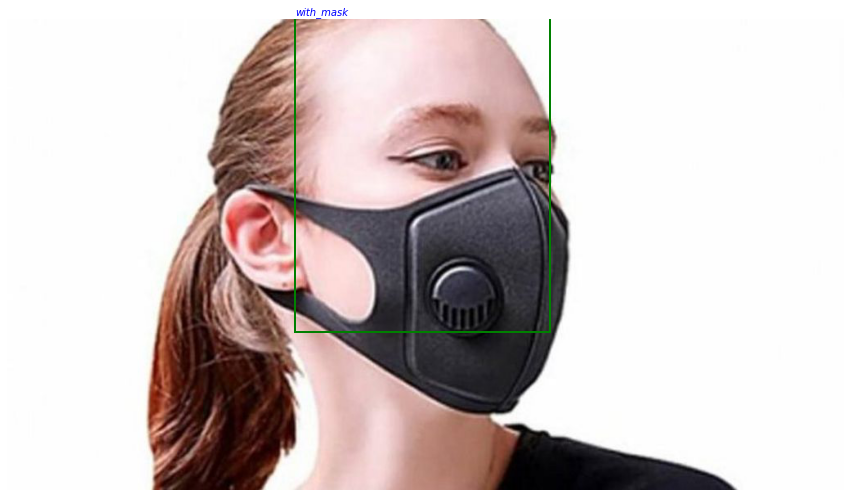

In [268]:
testing("test.jpg")

In [259]:
!wget "https://storage.googleapis.com/kagglesdsdata/datasets%2F710024%2F1246711%2FMedical%20mask%2FMedical%20mask%2FMedical%20Mask%2Fimages%2F0001.jpg?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1598961250&Signature=FiOy%2BwqLoytWF71Sd7Ot0dVj9gJJ9%2F5lINFoij9qoxcyksBlwBLOdWTf17Kl%2BLeIt2GWv%2FH%2FCKkFdn1U74TfSFGZ6XfYvSGKPG7XrJIKYpUYyb0tW9nXJuFtzwDboapKYj8QWCrZbkiHLmhTwAPSdCJOvRO9yUZENNLtiG6Pn%2BVTrkeUrvAxnnouSXDN70zfg2zpWna%2F87%2FrSSzMLbs9fZoOb3t5Rh83Zx612E1idRKjbQ%2F3kmmgP3VjprVbg8dhroM8uYleXQ00%2BHqGS%2FCakG23cPSP1SpINGAmJFAM%2BMGZW2QNsZQDHXRCUa1v%2FTrkSDP3p75aPYqwX5JmUppjRw%3D%3D" -O test2.jpg

--2020-08-30 06:09:26--  https://storage.googleapis.com/kagglesdsdata/datasets%2F710024%2F1246711%2FMedical%20mask%2FMedical%20mask%2FMedical%20Mask%2Fimages%2F0001.jpg?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1598961250&Signature=FiOy%2BwqLoytWF71Sd7Ot0dVj9gJJ9%2F5lINFoij9qoxcyksBlwBLOdWTf17Kl%2BLeIt2GWv%2FH%2FCKkFdn1U74TfSFGZ6XfYvSGKPG7XrJIKYpUYyb0tW9nXJuFtzwDboapKYj8QWCrZbkiHLmhTwAPSdCJOvRO9yUZENNLtiG6Pn%2BVTrkeUrvAxnnouSXDN70zfg2zpWna%2F87%2FrSSzMLbs9fZoOb3t5Rh83Zx612E1idRKjbQ%2F3kmmgP3VjprVbg8dhroM8uYleXQ00%2BHqGS%2FCakG23cPSP1SpINGAmJFAM%2BMGZW2QNsZQDHXRCUa1v%2FTrkSDP3p75aPYqwX5JmUppjRw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.128, 172.217.203.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120111 (117K) [image/jpeg]
Saving to: ‘test2.jpg’

test2.jpg           100%[===============

tensor([1], device='cuda:0')
tensor(1, device='cuda:0')


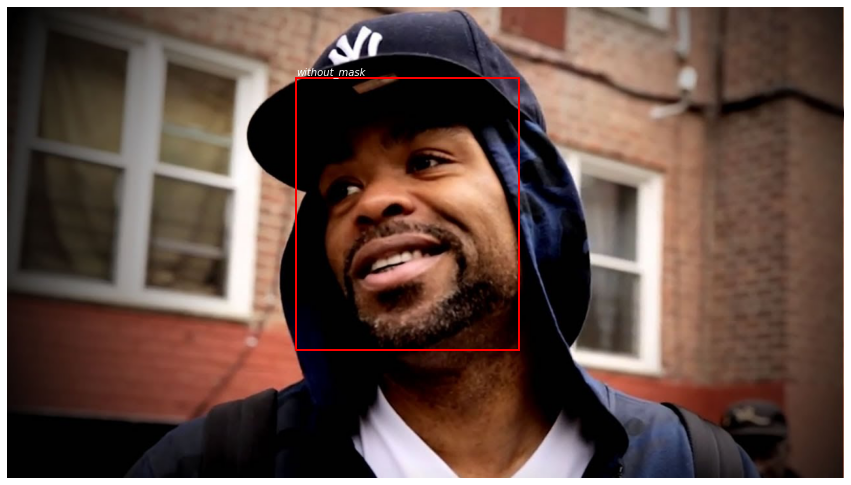

In [269]:
testing("test2.jpg")

In [261]:
!wget -O test3.jpg "https://img2.daumcdn.net/thumb/R658x0.q70/?fname=https://t1.daumcdn.net/news/202008/24/dongascience/20200824060024683skml.jpg"

--2020-08-30 06:09:36--  https://img2.daumcdn.net/thumb/R658x0.q70/?fname=https://t1.daumcdn.net/news/202008/24/dongascience/20200824060024683skml.jpg
Resolving img2.daumcdn.net (img2.daumcdn.net)... 121.53.206.163
Connecting to img2.daumcdn.net (img2.daumcdn.net)|121.53.206.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38693 (38K) [image/jpeg]
Saving to: ‘test3.jpg’

test3.jpg           100%[===================>]  37.79K   215KB/s    in 0.2s    

2020-08-30 06:09:38 (215 KB/s) - ‘test3.jpg’ saved [38693/38693]



[tensor([1], device='cuda:0'), tensor([1], device='cuda:0'), tensor([1], device='cuda:0'), tensor([1], device='cuda:0')]
tensor([1], device='cuda:0')
tensor([1], device='cuda:0')
tensor([1], device='cuda:0')
tensor([1], device='cuda:0')


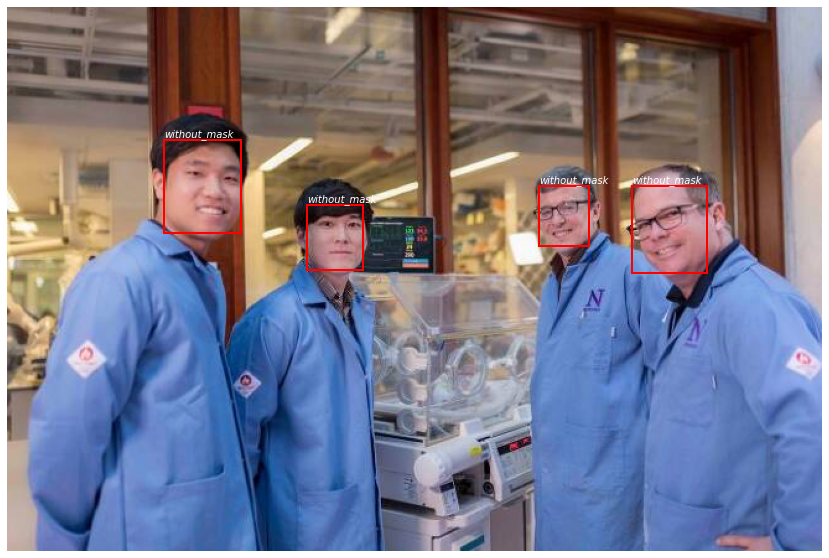

In [270]:
testing("test3.jpg")

In [263]:
!wget "https://storage.googleapis.com/kagglesdsdata/datasets%2F675484%2F1187790%2FFace%20Mask%20Dataset%2FValidation%2FWithoutMask%2F1238.png?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1599022080&Signature=gcwGfKBafhpfsqmnIj0qdBdntUDqO9CYAJCwC7x2mZpuTB3yy%2FsDjfdkLQ%2FG17StbriTPaNpdOTdakdvGuQkUKsRqXNodSI2Y8kwRATz0%2BXDPRqJ2Adv7qk2Q96eCbxQBo%2FeYulKJoDvjTa%2F%2B576NrWvKw4W%2BSTy7pZ%2BFRSiA0peZU8C3gFRuhRTSacoVPsZ4lug3kxpv8G5Lfpmxybgj7KfYe6cTILPUyjFhdgHj9bQjskNKI6ZClttyZP%2BcTX57IIf4Cbq8AGiEsap7ZApWoH7qkSGCGGD6W9sa1UZ%2BApxpMWrWJMNR6kcocHwDTKaoEyjSFFT8rUrjYGwcNDxlg%3D%3D" -O test4.jpg

--2020-08-30 06:09:51--  https://storage.googleapis.com/kagglesdsdata/datasets%2F675484%2F1187790%2FFace%20Mask%20Dataset%2FValidation%2FWithoutMask%2F1238.png?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1599022080&Signature=gcwGfKBafhpfsqmnIj0qdBdntUDqO9CYAJCwC7x2mZpuTB3yy%2FsDjfdkLQ%2FG17StbriTPaNpdOTdakdvGuQkUKsRqXNodSI2Y8kwRATz0%2BXDPRqJ2Adv7qk2Q96eCbxQBo%2FeYulKJoDvjTa%2F%2B576NrWvKw4W%2BSTy7pZ%2BFRSiA0peZU8C3gFRuhRTSacoVPsZ4lug3kxpv8G5Lfpmxybgj7KfYe6cTILPUyjFhdgHj9bQjskNKI6ZClttyZP%2BcTX57IIf4Cbq8AGiEsap7ZApWoH7qkSGCGGD6W9sa1UZ%2BApxpMWrWJMNR6kcocHwDTKaoEyjSFFT8rUrjYGwcNDxlg%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 173.194.216.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27987 (27K) [image/png]
Saving to: ‘test4.jpg’

test4.jpg           100%[===================>]  27.33K  --.-KB

tensor([1], device='cuda:0')
tensor(1, device='cuda:0')


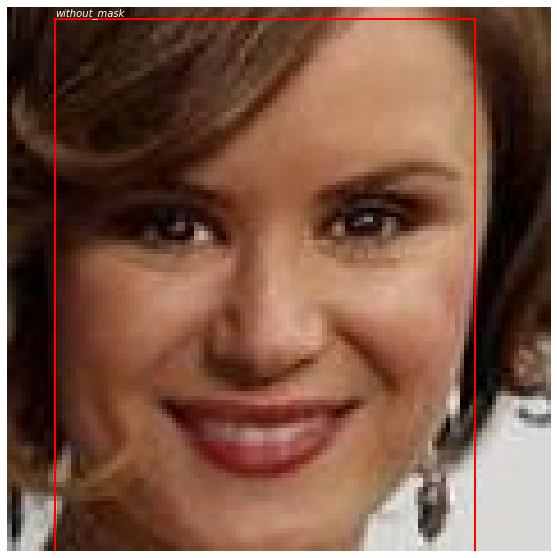

In [271]:
testing("test4.jpg")

[tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([1], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([1], device='cuda:0'), tensor([1], device='cuda:0'), tensor([1], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([1], device='cuda:0'), tensor([1], device='cuda:0'), tensor([0], device='cuda:0'), tensor([1], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([1], device='cuda:0'), tensor([0], device='cuda:0'), tensor([1], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0')]
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0],

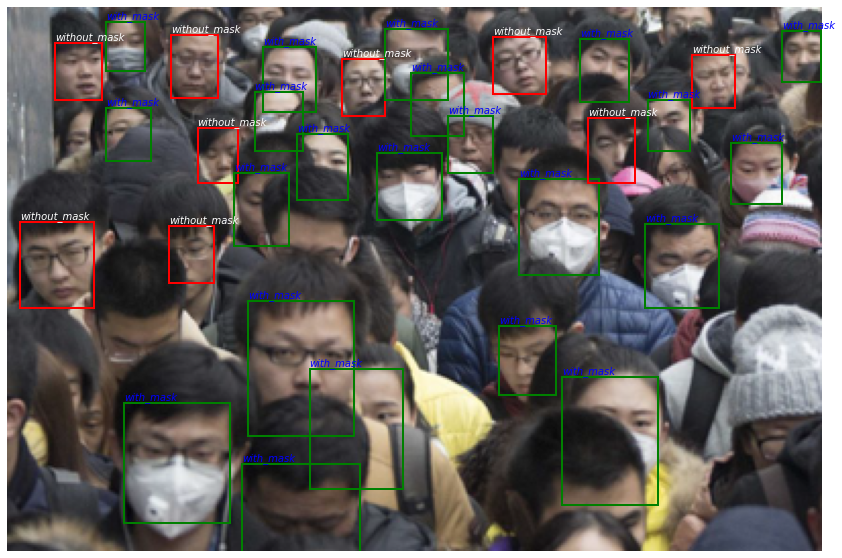

In [277]:
testing("/kaggle/input/face-mask-detection/images/maksssksksss110.png")

[tensor([1], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0')]
tensor([1], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')


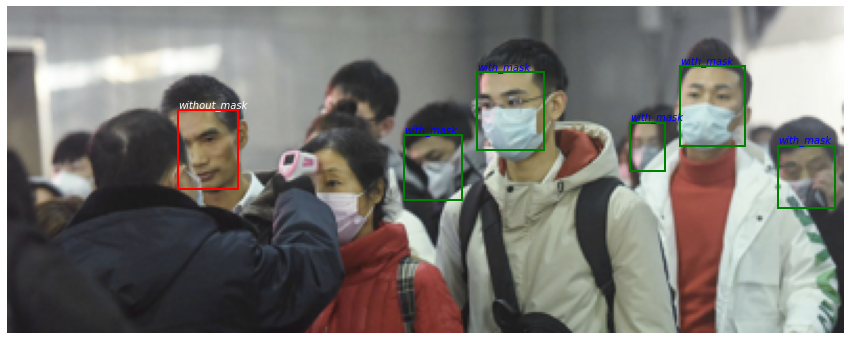

In [273]:
testing("/kaggle/input/face-mask-detection/images/maksssksksss1.png")